In [12]:
currentdirectory = '/Users/samanthatsoi/Desktop/VigaDigital/Seguimiento-Gestion-HUM'

In [13]:
#dependencies
import numpy as np
import array
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords
import re
import string
from collections import Counter #frequency of words
import unidecode
from itertools import groupby


In [14]:
#read in and clean data
xlsx = pd.ExcelFile(currentdirectory+ '/Reporte-Seguimiento-Gestion-HUM.xlsx')
df19raw = pd.read_excel(xlsx, 'PREGUNTAS HUM')
df18raw = pd.read_excel(xlsx, 'PREGUNTAS ANTIGUAS')
df19raw.columns = ['type', 'fecha-pregunta', 'usuario', 'email', 'titulo', 'seccion', 'pregunta', 'observacion', 'derivacion',
             'respuesta', 'autor', 'fecha-subida-pregunta', 'fecha-repuesta', 'fecha-repuesta-subida-x-valeria', 'status', 'link', 'delete']
df18raw.columns = ['type', 'fecha-pregunta', 'usuario', 'email', 'titulo', 'seccion', 'pregunta', 'observacion', 'derivacion',
             'respuesta', 'autor', 'fecha-subida-pregunta', 'fecha-repuesta', 'fecha-repuesta-subida-x-valeria', 'status', 'link']
df19raw.drop('delete', axis=1, inplace=True)
df1819raw = df19raw.append(df18raw)
all_columns = list(df1819raw)
df1819raw[all_columns] = df1819raw[all_columns].astype(str)

In [15]:
#cleans up column by... removing lowercase, punctuation, accents, and stopwords

def cleanupstr(dirtycol):
    newstr = (" ").join(dirtycol) #make from list to string
    lowerstr = newstr.lower() #remove lowercase
    nopuncstr = re.sub(r'[^\w\s]','',lowerstr) #remove punctuation
    readystr = unidecode.unidecode(nopuncstr) #remove accents
    
    customstopwords = ('hola', 'puedo', 'puede', 'quisiera', 'saber', 
                       'si', 'mas', 'debo', 'mejor', 'algun', 'quiero', 
                       'buenas', 'ahora', 'poner', 'hacer', 'pregunta'
                      ,'cada', 'queria', 'gracias', 'muchas', 'seria', 'asi',
                      'tal', 'tener', 'queria', 'ademas', 'cm', 'ayude', 'ser',
                      'luego', 'gustaria', 'duda', 'existe', 'favor', 'ayuda',
                      'posible', 'pregunta', 'alguna', 'hacerlo', 'solo', 'poder',
                      'sera', 'siguente', 'necesario', 'necesito', 'pueden', 'buen dia',
                      'comprar', 'usar', 'podria', 'tiempo', 'sale', 'caso', 'toda',
                      'bien', 'ayudar', 'realizar', 'dia', 'bueno', 'buena', 'saludo', 'saludos',
                      'debe', 'dia', 'amigo', 'hacia', 'pueda', 'buenos', 'despues',
                      'vi', 'ustedes', 'amigos', 'dias', 'dos', 'tambien', 'vez', 'puedan',
                      'tarde')
    #remove stopwords
    important_words=[]
    for word in readystr.split():
        if word in stopwords.words('spanish') or word in customstopwords or word.isdigit() or len(word)>15:
            None
        else:
            important_words.append(word)
    
    return important_words

In [16]:
#make a nice histogram

def histothis(columnhum):
    
    readystr = cleanupstr(columnhum)

    
    counterasdf= Counter(readystr).most_common(15)
    tituloname = []
    titulocount = []
    for i in counterasdf:
        tituloname.append(i[0])
        titulocount.append(i[1])

    # sort your values in descending order
    indSort = np.argsort(titulocount)[::-1]

    # rearrange your data
    labels = np.array(tituloname)[indSort]
    values = np.array(titulocount)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.5
    fig, ax = plt.subplots()
    ax.bar(indexes, values, align='center')

    # add labels
    
    ax.set_xticks(indexes)
    ax.set_xticklabels(labels, rotation=40)
    plt.xlabel('palabras', fontsize=18)
    plt.ylabel('frequencia', fontsize=16)
    fig.suptitle('15 palabras más usadas ', fontsize=20)
    fig.text(.5, -0.15, 'Figura 3: separado por las categorias a través del tiempo', ha='center')
    #plt.xticks(indexes + bar_width, labels)
    plt.show()
    

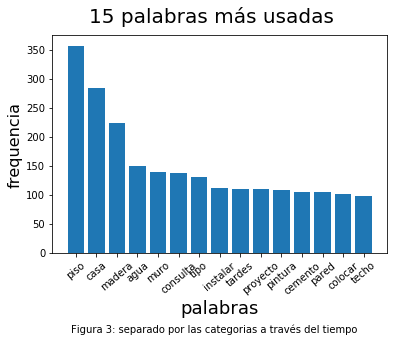

In [17]:
histothis(df1819raw['pregunta'])

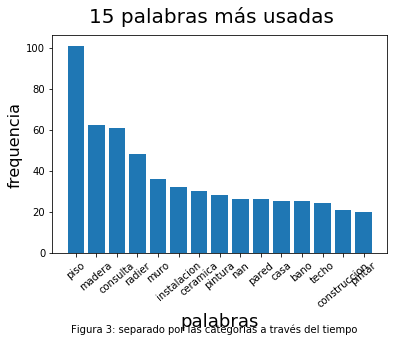

In [18]:
histothis(df1819raw['titulo'])

In [19]:
#assign cleaned up words to categories
df1819pregunta = cleanupstr(df1819raw['pregunta'])
df1819titulo = cleanupstr(df1819raw['titulo'])
categorias = {'caleficcionyaislacion': [], 'construccion': [], 'decoracion':[], 'gasfiteria':[], 'herramientas':[], 
              'iluminacion':[], 'mascotas':[], 'muebles':[], 'muros':[], 'ninos':[], 'pintura':[], 
              'pisosyrevestimientos':[], 'puertasyventanas':[], 'techumbres':[], 'exterior':[], 'quinchoyparrilla':[]}

#preguntasinstopwordsCounter = Counter(readystr1)
#preguntasinstopwords = pd.DataFrame.from_dict(d, orient='index').reset_index()
#preguntasinstopwords.to_excel("preguntas.xlsx")

In [20]:
#read in and clean data
cats = pd.read_excel(currentdirectory+'/preguntas_categoria.xlsx')
cats.columns = ['ind', 'palabra', 'count', 'categoria']
cats.drop('ind', axis=1, inplace=True)
cats_all_columns = list(cats)
cats[cats_all_columns] = cats[cats_all_columns].astype(str)


In [21]:
calecat = []
construcat = []
deccat = []
gastcat = []
herracat = []
ilumcat = []
mascotacat = []
mueblecat=[]
murocat = []
ninocat = []
pinturacat = []
pisocat = []
puertacat = []
techcat= []
extcat = []
quinchocat = []
dejardict = {}

 
#categorias = {'caleficcionyaislacion': [], 'construccion': [], 'decoracion':[], 'gasfiteria':[], 'herramientas':[], 
        #      'ilumnicaion':[], 'mascotas':[], 'muebles':[], 'muros':[], 'ninos':[], 'pintura':[], 
         #     'pisosyrevestimientos':[], 'puertasyventanas':[], 'techumbres':[]}
for item in df1819pregunta:
    #getting the 'palabra' where the 'categoria' column is 'Calefacción y Aislación'. panda.Series -> list
    if (item in (cats.loc[cats['categoria'] == 'Calefacción y Aislación', 'palabra']).tolist()):
        calecat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Construcción', 'palabra']).tolist()):   #construccion
        construcat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Decoración', 'palabra']).tolist()): #decoracion
        deccat.append(item)  
    if (item in (cats.loc[cats['categoria'] == 'Gasfitería', 'palabra']).tolist()): #gasfit
        gastcat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Herramientas', 'palabra']).tolist()): #herramientas
        herracat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Iluminación', 'palabra']).tolist()): #ilumniacion
        ilumcat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Mascotas', 'palabra']).tolist()): #mascotas
        mascotacat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Muebles', 'palabra']).tolist()): #muebles
        mueblecat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Muros', 'palabra']).tolist()): #muros
        murocat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Niños', 'palabra']).tolist()): #ninos
        ninocat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Pintura', 'palabra']).tolist()): #ninos
        pinturacat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Pisos', 'palabra']).tolist()): #pisos
        pisocat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Puertas y ventanas', 'palabra']).tolist()): #puertas y ventanas
        puertacat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Techumbres', 'palabra']).tolist()): #techumbres
        techcat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Exterior', 'palabra']).tolist()): #exterior
        extcat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Quincho y parrilla', 'palabra']).tolist()): #quincho
        quinchocat.append(item)
    if (item in (cats.loc[cats['categoria'] == 'Dejar', 'palabra']).tolist()): #dejar
        if item not in dejardict:
            dejardict[item] = 1
        else:
            dejardict[item] +=1
    

categorias['caleficcionyaislacion'] = Counter(calecat)
categorias['construccion'] = Counter(construcat)
categorias['decoracion'] = Counter(deccat)
categorias['gasfiteria'] = Counter(gastcat)
categorias['herramientas'] = Counter(herracat)
categorias['iluminacion'] = Counter(ilumcat)
categorias['mascotas'] = Counter(mascotacat)
categorias['muebles'] = Counter(mueblecat)
categorias['muros'] = Counter(murocat)
categorias['ninos'] = Counter(ninocat)
categorias['pintura']= Counter(pinturacat)
categorias['pisosyrevestimientos'] = Counter(pisocat)
categorias['puertasyventanas'] = Counter(puertacat)
categorias['techumbres'] = Counter(techcat)
categorias['exterior'] = Counter(extcat)
categorias['quinchoyparrilla'] = Counter(quinchocat)

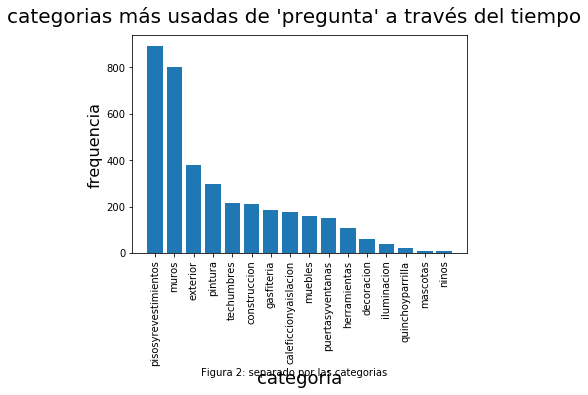

In [22]:
tituloname = []
titulocount = []
for categoria, count in categorias.items():
    tituloname.append(categoria)
    titulocount.append(sum(count.values()))


# sort values in descending order and rearrange
indSort = np.argsort(titulocount)[::-1]
labels = np.array(tituloname)[indSort]
values = np.array(titulocount)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.5
fig, ax = plt.subplots()
ax.bar(indexes, values, align='center')

# add labels

ax.set_xticks(indexes)
ax.set_xticklabels(labels, rotation=90)
plt.xlabel('categoria', fontsize=18)
plt.ylabel('frequencia', fontsize=16)
fig.suptitle('categorias más usadas de \'pregunta\' a través del tiempo', fontsize=20)
fig.text(.5, -0.3, 'Figura 2: separado por las categorias', ha='center')
#plt.xticks(indexes + bar_width, labels)
plt.show()

In [23]:
#make a wordcloud with customization
def wordcloudthis(columnhum):
    readystr = cleanupstr(columnhum)

    readytitulomod = (" ").join(readystr)

    #generate wordcloud
    wordcloud = WordCloud(width = 1000, height = 500, 
                          collocations=True, background_color = 'white', 
                          contour_width = 3, contour_color='steelblue').generate(readytitulomod)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)

([], <a list of 0 Text yticklabel objects>)

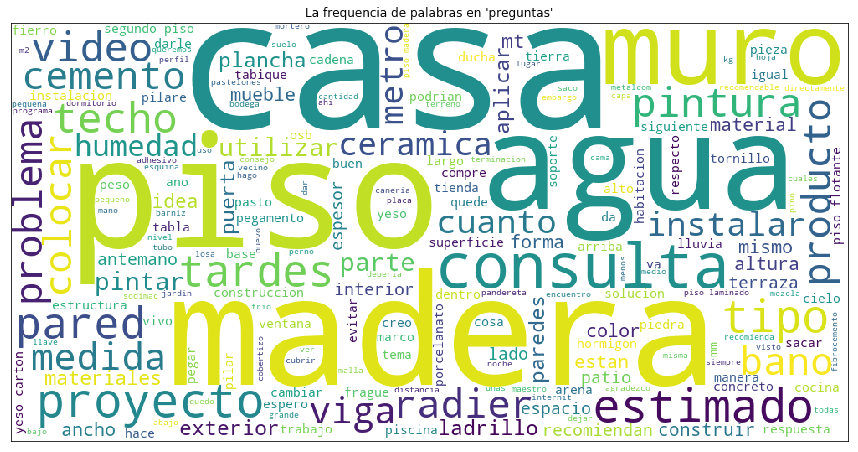

In [24]:
wordcloudthis(df1819pregunta)
plt.title('La frequencia de palabras en \'preguntas\'')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

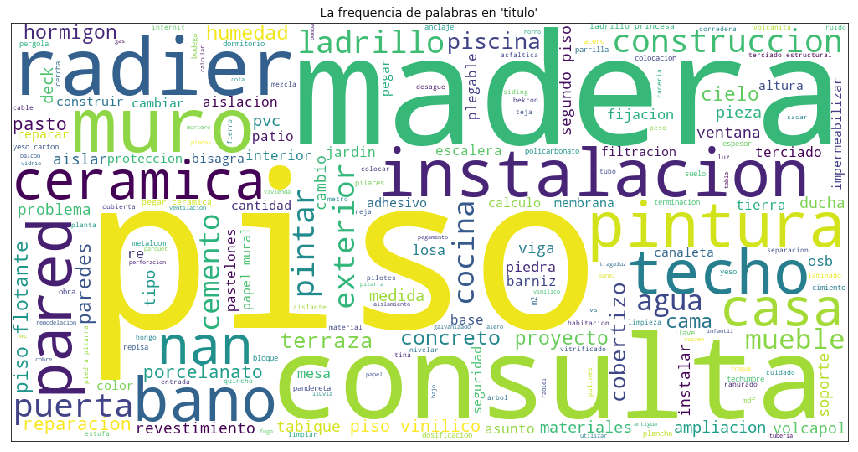

In [25]:
wordcloudthis(df1819titulo)
plt.title('La frequencia de palabras en \'titulo\'')
plt.xticks([])
plt.yticks([])

In [26]:
def cleanupstr2(dirtycol):
    if pd.isnull(dirtycol):
        return
    lowerstr = dirtycol.lower() #remove lowercase
    nopuncstr = re.sub(r'[^\w\s]','',lowerstr) #remove punctuation
    readystr = unidecode.unidecode(nopuncstr) #remove accents
    
    customstopwords = ('hola', 'puedo', 'puede', 'quisiera', 'saber', 
                       'si', 'mas', 'debo', 'mejor', 'algun', 'quiero', 
                       'buenas', 'ahora', 'poner', 'hacer', 'pregunta'
                      ,'cada', 'queria', 'gracias', 'muchas', 'seria', 'asi',
                      'tal', 'tener', 'queria', 'ademas', 'cm', 'ayude', 'ser',
                      'luego', 'gustaria', 'duda', 'existe', 'favor', 'ayuda',
                      'posible', 'pregunta', 'alguna', 'hacerlo', 'solo', 'poder',
                      'sera', 'siguente', 'necesario', 'necesito', 'pueden', 'buen dia',
                      'comprar', 'usar', 'podria', 'tiempo', 'sale', 'caso', 'toda',
                      'bien', 'ayudar', 'realizar', 'dia', 'bueno', 'buena', 'saludo', 'saludos',
                      'debe', 'dia', 'amigo', 'hacia', 'pueda', 'buenos', 'despues',
                      'vi', 'ustedes', 'amigos', 'dias', 'dos', 'tambien', 'vez', 'puedan', 'va'
                      'tarde')
    #remove stopwords
    important_words=[]
    for word in readystr.split():
        if word in stopwords.words('spanish') or word in customstopwords or word.isdigit() or len(word)>15:
            None
        else:
            important_words.append(word)
    
    return important_words
#cleanupstr2(df1819preguntatime['pregunta'])

In [27]:
dict1819preguntatime = {'pregunta': df1819raw['pregunta'], 'date': df1819raw['fecha-pregunta']}
df1819preguntatime = pd.DataFrame(dict1819preguntatime, columns = ['date', 'pregunta'])
df1819preguntatime['date'] = pd.to_datetime(df1819preguntatime['date'])
temp = []
for index, row in df1819preguntatime.iterrows():
    temp.append({'date':row['date'], 'pregunta':cleanupstr2(row['pregunta'])})

df1819preguntatime = pd.DataFrame(temp, columns = ['date', 'pregunta'])
df1819preguntatime= df1819preguntatime[df1819preguntatime.date.notnull()] #get rid of rows with null dates
df1819preguntatime= df1819preguntatime[df1819preguntatime.pregunta.notnull()] #get rid of rows with null preguntas

In [28]:
#put them into categories based on our file
dejardict = {}
date = []
cat = []


 
#categorias = {'caleficcionyaislacion': [], 'construccion': [], 'decoracion':[], 'gasfiteria':[], 'herramientas':[], 
        #      'ilumnicaion':[], 'mascotas':[], 'muebles':[], 'muros':[], 'ninos':[], 'pintura':[], 
         #     'pisosyrevestimientos':[], 'puertasyventanas':[], 'techumbres':[]}
for index,info in df1819preguntatime.iterrows():
    for item in info[1]:
        if pd.isnull(item):
            continue
        #getting the 'palabra' where the 'categoria' column is 'Calefacción y Aislación'. panda.Series -> list
        if (item in (cats.loc[cats['categoria'] == 'Calefacción y Aislación', 'palabra']).tolist()):
   #         calecat.append(item)
            cat.append('calefaccion')
            date.append(info[0]) #we need to make sure it's in a category first, then we add the time
        if (item in (cats.loc[cats['categoria'] == 'Construcción', 'palabra']).tolist()):   #construccion
    #        construcat.append(item)
            cat.append('construccion')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Decoración', 'palabra']).tolist()): #decoracion
#            deccat.append(item)
            cat.append('decoracion')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Gasfitería', 'palabra']).tolist()): #gasfit
 #           gastcat.append(item)
            cat.append('gastiferia')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Herramientas', 'palabra']).tolist()): #herramientas
#            herracat.append(item)
            cat.append('herramientas')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Iluminación', 'palabra']).tolist()): #ilumniacion
#            ilumcat.append(item)
            cat.append('iluminacion')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Mascotas', 'palabra']).tolist()): #mascotas
 #           mascotacat.append(item)
            cat.append('mascotas')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Muebles', 'palabra']).tolist()): #muebles
    #        mueblecat.append(item)
            cat.append('muebles')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Muros', 'palabra']).tolist()): #muros
      #      murocat.append(item)
            cat.append('muros')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Niños', 'palabra']).tolist()): #ninos
           # ninocat.append(item)
            cat.append('nino')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Pintura', 'palabra']).tolist()): #ninos
         #   pinturacat.append(item)
            cat.append('pintura')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Pisos', 'palabra']).tolist()): #pisos
        #    pisocat.append(item)
            cat.append('pisos')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Puertas y ventanas', 'palabra']).tolist()): #puertas y ventanas
      #      puertacat.append(item)
            cat.append('puertasyventanas')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Techumbres', 'palabra']).tolist()): #techumbres
     #       techcat.append(item)
            cat.append('techumbres')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Exterior', 'palabra']).tolist()): #exterior
    #        extcat.append(item)
            cat.append('exterior')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Quincho y parrilla', 'palabra']).tolist()): #quincho
     #       quinchocat.append(item)
            cat.append('quinchoyparrilla')
            date.append(info[0])
        if (item in (cats.loc[cats['categoria'] == 'Dejar', 'palabra']).tolist()): #dejar
            if item not in dejardict:
                dejardict[item] = 1
            else:
                dejardict[item] +=1

In [29]:
#testdf combines each entries's category and date
testdf = pd.DataFrame({'category':cat,
                   'date':date})
testdf['date'] = pd.to_datetime(testdf['date'])
testdf['year'] = testdf['date'].dt.year
testdf['month'] = testdf['date'].dt.month

In [30]:
#combine year and months to a date and finds frequency for month and year
counts1819 = testdf.groupby(['category', 'year','month']).size().reset_index(name='Size')
counts1819['date'] = counts1819.year.astype(str).str.cat(counts1819.month.astype(str), sep='-') 

Text(0.5, -0.15, 'Figura 1: todas las categorias')

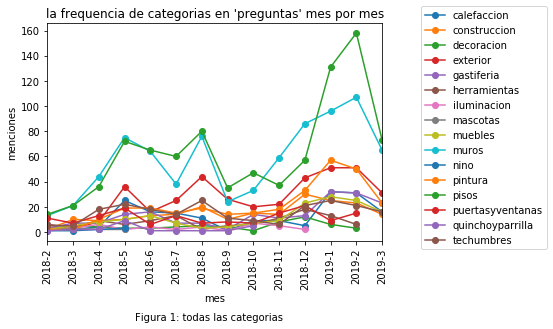

In [31]:
#plot all categories
xlabels = list(counts1819.date.unique())
fig, ax = plt.subplots()
for label, grp in counts1819.groupby('category'):
    grp.plot(x = 'date', y = 'Size',ax = ax, label = label, marker = 'o')
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.xticks(np.arange(0,len(xlabels)),xlabels, rotation = '90')
ax.set_ylabel('menciones')
ax.set_xlabel('mes')
ax.set_title('la frequencia de categorias en \'preguntas\' mes por mes')
fig.text(.5, -0.15, 'Figura 1: todas las categorias', ha='center')

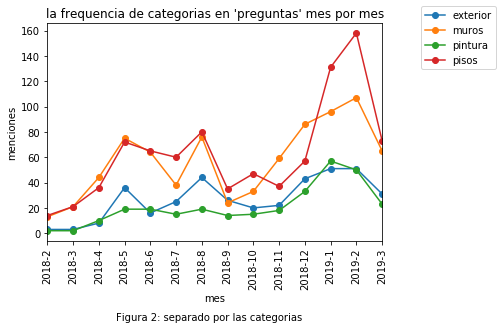

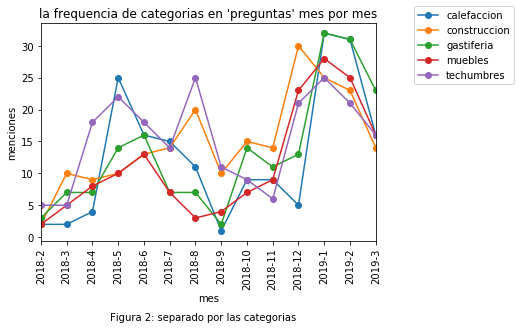

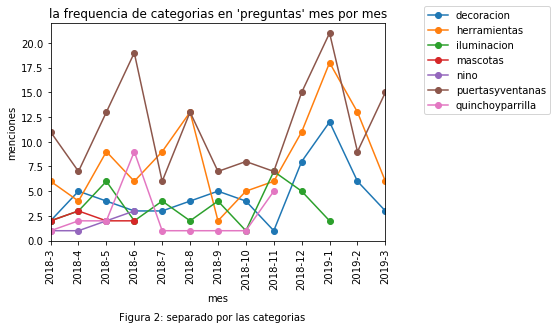

In [32]:
#plot each categories separately

#the difference between the max and the min for each category
diffcts1819 = counts1819.groupby(counts1819.category).max()['Size'] - counts1819.groupby(counts1819.category).min()['Size']
pd.Series(np.sort(diffcts1819) , index=diffcts1819.index)
sorteddiffcts1819 = diffcts1819.sort_values(ascending=False)

#separate the categories based on the max-min (the difference) of each category
zoom1 = []
zoom2 = []
zoom3 = []
for i in range(0,len(sorteddiffcts1819)):
    if(i < 4):
        zoom1.append(counts1819[counts1819.category == sorteddiffcts1819.index[i]])
    elif(i >= 4 and i < 9):
        zoom2.append(counts1819[counts1819.category == sorteddiffcts1819.index[i]])
    else:
        zoom3.append(counts1819[counts1819.category == sorteddiffcts1819.index[i]])

zoom1 = pd.concat(zoom1)
zoom2 = pd.concat(zoom2)
zoom3 = pd.concat(zoom3)

#graph it
def graph(zoom):
    xlabels = list(zoom.date.unique())
    fig, ax = plt.subplots()
    for label, grp in zoom.groupby('category'):
        grp.plot(x = 'date', y = 'Size',ax = ax, label = label, marker = 'o')
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    #plt.ylim([-1,50])
    plt.xticks(np.arange(0,len(xlabels)),xlabels, rotation = '90')
    ax.set_ylabel('menciones')
    ax.set_xlabel('mes')
    ax.set_title('la frequencia de categorias en \'preguntas\' mes por mes')
    fig.text(.5, -0.15, 'Figura 2: separado por las categorias', ha='center')
graph(zoom1)
graph(zoom2)
graph(zoom3)

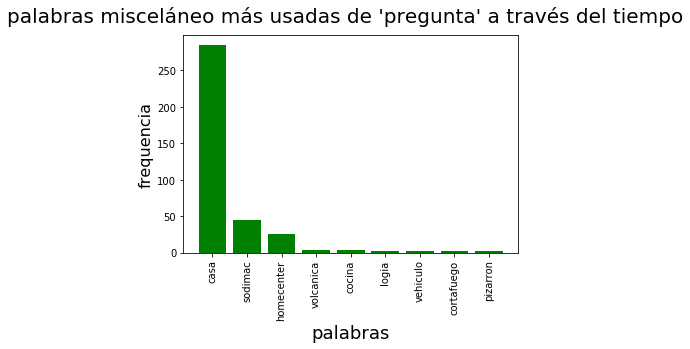

In [33]:
# sort values in descending order and rearrange
indSort = np.argsort(list(dejardict.values()))[::-1]
labels = np.array(list(dejardict.keys()))[indSort]
values = np.array(list(dejardict.values()))[indSort]

indexes = np.arange(len(labels))

#plt.bar(list(dejardict.keys()), dejardict.values(), color='g')
bar_width = 0.5
fig, ax = plt.subplots()
ax.bar(labels,values, color='g', align='center')

# add labels

ax.set_xticks(np.arange(len(list(dejardict.keys()))))
ax.set_xticklabels(list(dejardict.keys()), rotation=90)
plt.xlabel('palabras', fontsize=18)
plt.ylabel('frequencia', fontsize=16)
fig.suptitle('palabras misceláneo más usadas de \'pregunta\' a través del tiempo', fontsize=20)

plt.show()

In [34]:
counts1819

,category,year,month,Size,date
0,calefaccion,2018,2,2,2018-2
1,calefaccion,2018,3,2,2018-3
2,calefaccion,2018,4,4,2018-4
3,calefaccion,2018,5,25,2018-5
4,calefaccion,2018,6,16,2018-6
5,calefaccion,2018,7,15,2018-7
6,calefaccion,2018,8,11,2018-8
7,calefaccion,2018,9,1,2018-9
8,calefaccion,2018,10,9,2018-10
9,calefaccion,2018,11,9,2018-11
